hash

elapsed_time

retry_time

age

evaluation_status

evaluation_gen

evaluation_start_time

tree

error_string

pickle

"FullDataSet False Positives"

"FullDataSet False Negatives"

"FullDataSet Num Elements"

id

optimization

generation

hash

The only things I want is the False Positive, False Negative and the generation it was part of.



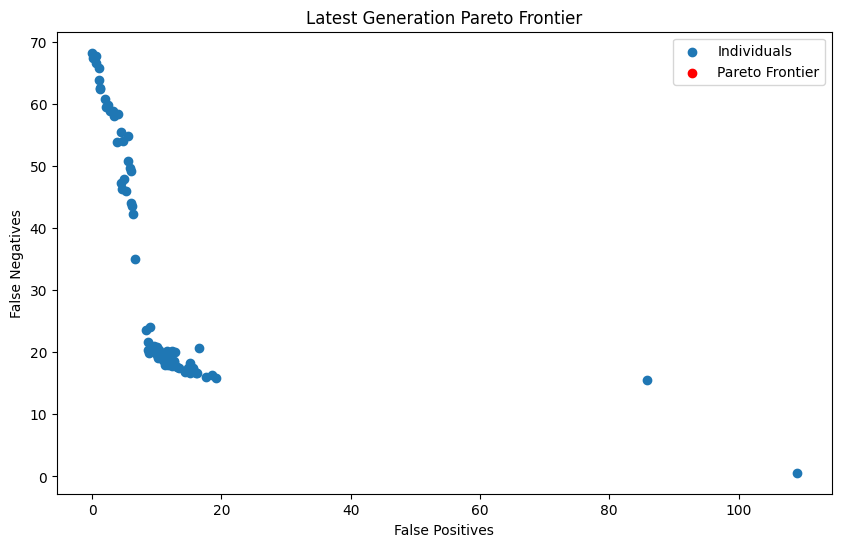

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'pareto_front_latest_gen.csv'
df = pd.read_csv(file_path)

# Extract the False Positives and False Negatives columns correctly
fp = df['FullDataSet False Positives'].values  # Corrected to .values
fn = df['FullDataSet False Negatives'].values  # Corrected to .values

def is_pareto_efficient(costs):
    is_efficient = np.ones(costs.shape[0], dtype=bool)  # Initialize all points as efficient
    for i, c in enumerate(costs):
        if is_efficient[i]:
            # Keep only points that are not dominated by any other point
            is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)
    return is_efficient

# Step 4: Apply the Pareto frontier calculation
costs = np.column_stack((fp, fn))  # Combine both columns for comparison
pareto_frontier = is_pareto_efficient(costs)  # Identify Pareto-efficient points

# Step 5: Plot the Pareto frontier
plt.figure(figsize=(10, 6))
plt.scatter(fp, fn, label='Individuals')  # Plot all individuals
plt.scatter(fp[pareto_frontier], fn[pareto_frontier], color='red', label='Pareto Frontier')  # Plot Pareto points

# Label the plot
plt.xlabel('False Positives')
plt.ylabel('False Negatives')
plt.title('Latest Generation Pareto Frontier')
plt.legend()

# Show the plot
plt.show()


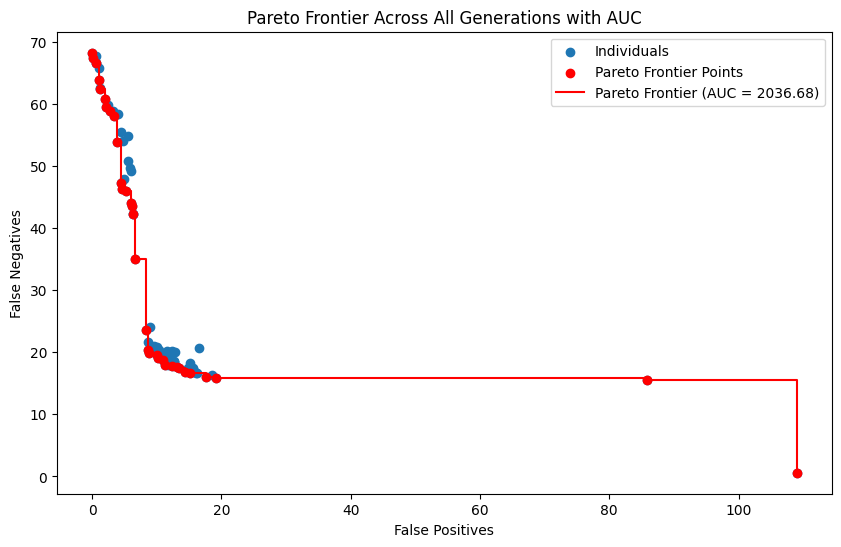

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = 'pareto_front_across_all_generations.csv'
df = pd.read_csv(file_path)

# Extract the False Positives and False Negatives columns correctly
fp = df['FullDataSet False Positives'].values
fn = df['FullDataSet False Negatives'].values

# Combine both columns into a single array for pareto calculation
data = np.column_stack((fp, fn))

# Pareto frontier calculation for minimization problem
def find_pareto(data):
    is_Pareto = np.ones(data.shape[0], dtype=bool)
    for i, c in enumerate(data):
        if is_Pareto[i]:
            # Minimization: keep points with lower costs
            is_Pareto[is_Pareto] = np.any(data[is_Pareto] < c, axis=1)
            # Keep self
            is_Pareto[i] = True
    # Downsample from boolean array
    Pareto_data = data[is_Pareto, :]
    # Sort the Pareto points by the first column (False Positives)
    Pareto_out = Pareto_data[np.argsort(Pareto_data[:, 0])]
    return Pareto_out, is_Pareto

# Use the Pareto function to find the efficient points
pareto_front, pareto_mask = find_pareto(data)

# Calculate AUC using a Riemann sum over the Pareto frontier
auc = np.sum(np.diff(pareto_front[:, 0]) * pareto_front[:-1, 1])

# Step 5: Plot the results with Pareto points and red AUC line
plt.figure(figsize=(10, 6))
plt.scatter(fp, fn, label='Individuals')  # Plot all individuals
plt.scatter(fp[pareto_mask], fn[pareto_mask], color='red', label='Pareto Frontier Points')  # Plot Pareto points in red

# Step plot for Pareto minimization (post for minimization), with a red line
plt.step(pareto_front[:, 0], pareto_front[:, 1], where='post', color='red', label=f'Pareto Frontier (AUC = {auc:.2f})')

# Label the plot
plt.xlabel('False Positives')
plt.ylabel('False Negatives')
plt.title('Pareto Frontier Across All Generations with AUC')
plt.legend()

# Show the plot
plt.show()



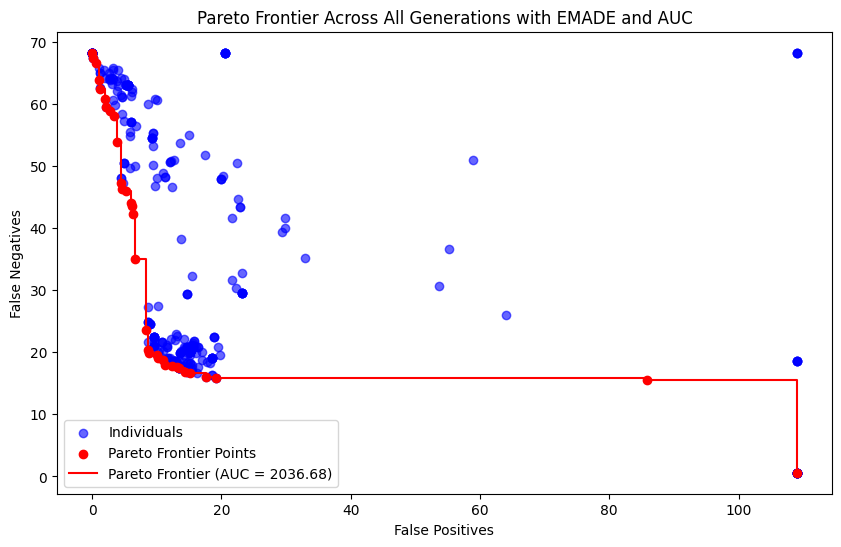

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV files into pandas DataFrames
file_path = 'pareto_front_across_all_generations.csv'
df = pd.read_csv(file_path)

# Load the additional CSV file into a pandas DataFrame for emade_individuals
file_path_emade = 'emade_individuals.csv'
df_emade = pd.read_csv(file_path_emade)

# Extract the False Positives and False Negatives columns from both dataframes
fp = pd.to_numeric(df['FullDataSet False Positives'], errors='coerce')
fn = pd.to_numeric(df['FullDataSet False Negatives'], errors='coerce')

fp_emade = pd.to_numeric(df_emade['FullDataSet False Positives'], errors='coerce')
fn_emade = pd.to_numeric(df_emade['FullDataSet False Negatives'], errors='coerce')

# Clean the data: Remove any rows with NaN or invalid entries in emade_individuals
valid_emade_mask = np.isfinite(fp_emade) & np.isfinite(fn_emade)
fp_emade = fp_emade[valid_emade_mask]
fn_emade = fn_emade[valid_emade_mask]

# Combine both columns into a single array for pareto calculation
data = np.column_stack((fp, fn))

# Pareto frontier calculation for minimization problem
def find_pareto(data):
    is_Pareto = np.ones(data.shape[0], dtype=bool)
    for i, c in enumerate(data):
        if is_Pareto[i]:
            # Minimization: keep points with lower costs
            is_Pareto[is_Pareto] = np.any(data[is_Pareto] < c, axis=1)
            # Keep self
            is_Pareto[i] = True
    # Downsample from boolean array
    Pareto_data = data[is_Pareto, :]
    # Sort the Pareto points by the first column (False Positives)
    Pareto_out = Pareto_data[np.argsort(Pareto_data[:, 0])]
    return Pareto_out, is_Pareto

# Use the Pareto function to find the efficient points
pareto_front, pareto_mask = find_pareto(data)

# Calculate AUC using a Riemann sum over the Pareto frontier
auc = np.sum(np.diff(pareto_front[:, 0]) * pareto_front[:-1, 1])

# Step 5: Plot the results with Pareto points, emade individuals, and red AUC line
plt.figure(figsize=(10, 6))

# Plot individuals from emade_individuals
plt.scatter(fp_emade, fn_emade, label='Individuals', alpha=0.6, color='blue')

# Plot Pareto frontier points
plt.scatter(fp[pareto_mask], fn[pareto_mask], color='red', label='Pareto Frontier Points')

# Step plot for Pareto minimization (post for minimization), with a red line
plt.step(pareto_front[:, 0], pareto_front[:, 1], where='post', color='red', label=f'Pareto Frontier (AUC = {auc:.2f})')

# Label the plot
plt.xlabel('False Positives')
plt.ylabel('False Negatives')
plt.title('Pareto Frontier Across All Generations with EMADE and AUC')
plt.legend()

# Show the plot
plt.show()

